# TensorFlow: Keras

[TensorFlow](https://www.tensorflow.org) is a machine learning and artifical intelligence platform. While including broad functionality, we will focus here on artificial neural networks (ANN). To build such networks, we will leverage the high level API [Keras](https://keras.io/) and show here how to use 'the sequential model'. This is allows to create the simplest form of neural networks, a fully connected feed forward structure. This unhandy term basically refers to a stack of so called layers of neurons, where one neuron of one layer is 'connected' to each neuron of the subsequent layer (as we won't go into theoretic details: [original paper](https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf), [Wikipedia](https://en.wikipedia.org/wiki/Feedforward_neural_network), [The Elements of Statistical Learning, chapter 11](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)).

TensorFlow works with numpy arrays and pandas dataframes. We will now try to do a regression on some simulated data, using a neural network.

The package `tensorflow` must be installed.
To build neural networks, we start by importing the necessary modules. Note that Keras is delivered as a submodule to TensorFlow, which we can access using the dot chaining, and that we only import `layers`.

In [1]:
from tensorflow import keras, random
import numpy as np
import matplotlib.pyplot as plt

random.set_seed(102)

We will write a function to simulate some data using numpy. We include a `noise` argument to be able to view the true function, which is obfuscated by the added noise.

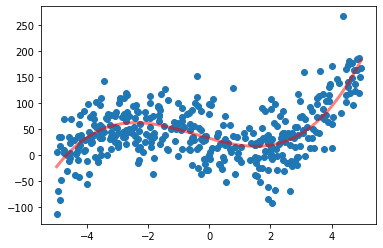

In [2]:
x = np.sort(np.random.uniform(-5,5,400))

def make_data(a, b, c, _x=x, noise=True):
    if noise==True:
        return a*_x + b*(_x-4)**2 + c*_x**3 + np.random.normal(0,40,len(_x))
    if noise==False:
        return a*_x + b*(_x-4)**2 + c*_x**3

y = make_data(-.5,2,1.5)
plt.scatter(x,y)
plt.plot(x,make_data(-.5,2,1.5, noise=False), c='red', lw=3, alpha=.5)
plt.show()

We define a very simple fully connected ANN with one hidden layer and only zwo neurons inside that layer. Since we aim to perform regression, we use one neuron in the output layer.
To do so in the code, we kall `keras.Sequential` and add as argument all layers as a list. Elements of that list are `keras.layers.Dense` objects, which represent fully connected layers. Note that the order by which you define this list, corresponds to the stacking of the layers.
As arguments of `Dense`, we specify the number of neurons and the desired activation function. We may also give names to the layers, which might be ore useful for more complex net architectures.

Be aware that we do define an input shape here. Instead, we could let Keras do so automatically using the dimension of our input data. However, the specification of the input shape enables us to view the model summary without having to run anything else beforehand.

In [3]:
model = keras.Sequential([
        keras.layers.Dense(2, activation="relu", input_shape=(1,), name="hidden_layer"),
        keras.layers.Dense(1, name="output_layer"),
], name='my_first_model')

2021-10-14 10:45:23.575602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


A summary of the definded model can be printed calling the method of the same name.

In [4]:
model.summary()

Model: "my_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 2)                 4         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


Having defined the model, we must compile, i.e. set the final configuration. We call the `.compile()` method on our model and specify the optimization algorithm (and the learning rate) and the loss function, by which the model should be trained. For regression, we use the mean squared error.

The learning rate is a hyperparameter and is to be chosen to suit the problem at hand. It's possible to find an optimal rate by random or grid search, which we will not further discuss here.

In [5]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=5e-2), loss=keras.losses.MeanSquaredError(), )

We can now train the model, i.e. set the weights accordingly as to minimize the calculated error from deviations between model predictions and training data.

We do so by calling the `.fit()` method to which we supply the data and the number of episodes (iterations to tune the weights). Furthermore, we can set the `batch_size`, which defines the number of samples for which the weight updates are accumulated.

We can save all information returned from the fitting process in a `History` object, here called `history`. Through this object, we can access this information, once the fitting is done.

In [6]:
history = model.fit(x,y, epochs=150, batch_size=30)

2021-10-14 10:45:23.809495: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
14/14 [==============================] - 0s 657us/step - loss: 4470.3457
Epoch 2/150
14/14 [==============================] - 0s 619us/step - loss: 3971.0054
Epoch 3/150
14/14 [==============================] - 0s 621us/step - loss: 3467.3037
Epoch 4/150
14/14 [==============================] - 0s 631us/step - loss: 3079.7207
Epoch 5/150
14/14 [==============================] - 0s 638us/step - loss: 2916.2766
Epoch 6/150
14/14 [==============================] - 0s 619us/step - loss: 2892.6719
Epoch 7/150
14/14 [==============================] - 0s 617us/step - loss: 2861.6719
Epoch 8/150
14/14 [==============================] - 0s 607us/step - loss: 2846.9226
Epoch 9/150
14/14 [==============================] - 0s 566us/step - loss: 2818.4285
Epoch 10/150
14/14 [==============================] - 0s 562us/step - loss: 2793.8281
Epoch 11/150
14/14 [==============================] - 0s 525us/step - loss: 2761.9172
Epoch 12/150
14/14 [==============================] - 0s 563us/

We get a printed output for each episodes, showing some information about the step. Below the 'Epochs', we see that a batch size of 30 at a 300 observations results in 10 (300 divided by 30) updates per epoch.

Of more interest is the rightmost piece of information, the loss. As the weights are adjusted, the model predictions fit the data progressively better - the loss decreases. At some point, the model in its current configuration reaches an optimal weight setting and the loss will oscillate around some value.

Note that by setting `verbose=0`, we can suppress any output.

Using `history` we can now plot the loss over time/epochs. To do so, we use "our" `history` object and access its `.history` attribute, which is a dict:

In [7]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['loss'])


Note that more values may be added to this dict. We will see this case for the next model.

With matplotlib, we plot the loss over time.

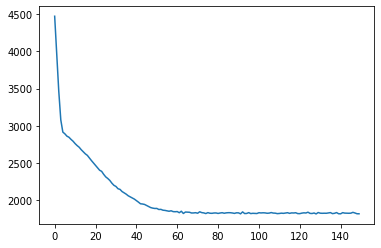

In [8]:
plt.plot(history.history['loss'])

Apparently, the loss dropped very quickly in the beginning and reaches a minimal level after about 75 epochs.

Beside the `history` object, we can take a look at the trained weights by calling `model.get_weights()`.

In [9]:
for layer in model.layers:
    print(f"{layer.name}: weights {layer.get_weights()}")

hidden_layer: weights [array([[3.687329 , 2.6136518]], dtype=float32), array([-10.034517,  -7.102841], dtype=float32)]
output_layer: weights [array([[13.204637],
       [ 5.165712]], dtype=float32), array([33.05681], dtype=float32)]


For each layer, we see the number of entries corresponding to 'params' in the model summary above. The first array per layer gives the weights, the second array the bias.

Note here, that it is perfectly possible to save the weights of a model, e.g. in a file, and then load this model again later by setting these weights to the model weights. Of course, the model configuration must remain the same in order to use the weights. However, the already implemented `.save('my_path')` method does exactly that. To load the model, use `.model.load('my_path')`.

To see the predicitions from our model, we use the `.predict()` method, to which we only pass the x values, and store the result in a variable.

In [10]:
y_pred = model.predict(x)

Finally, we can get a look on how this simple neural network approximates our data:

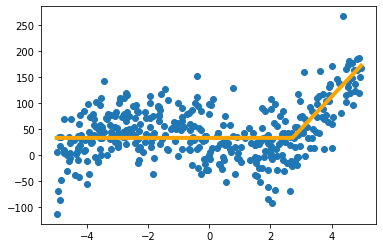

In [11]:
plt.scatter(x, y)
plt.plot(x,y_pred.reshape(-1), color='orange', lw=4)
plt.show()

Interestingly, the ReLU shape of the function can be seen rather clearly.

Now, let's try to do better than that.

## A more complex model

We will now test if a more flexible, more complex model with more layers and neurons, will approximate the data more accurately

First, we define a this new model as seen above.

In [12]:
random.set_seed(11)

better_model = keras.Sequential([
        keras.layers.Dense(22, activation="relu", name="l1"),
        keras.layers.Dense(11, activation="relu", name="l2"),
        keras.layers.Dense(1, name="lo"),
])

We will try a smaller learning rate (and may thus increase the number of epochs).

In [13]:
better_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=6e-3), loss=keras.losses.MeanSquaredError())

Usually, when training a model, we split the data into a training and test set. We will do this using sklearn's `train_test_split`. Conveniently, in Keras, we can pass the validation data using the `validation_data` argument of `.fit()`.

Another possibility is to use `validation_split`, which will, when set for example to `.2`, omit 20% of the training data and evaluate the performance for this "unknown" part of the data. Beware, that this will only work for shuffled data, as the validation data is taken from the last entries of the data.

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state= 22)

In [15]:
better_history = better_model.fit(x_train,y_train, epochs=300, validation_data=(x_test,y_test))

Epoch 1/300
11/11 [==============================] - 0s 10ms/step - loss: 4423.1855 - val_loss: 4764.9458
Epoch 2/300
11/11 [==============================] - 0s 2ms/step - loss: 4059.0317 - val_loss: 4278.1099
Epoch 3/300
11/11 [==============================] - 0s 2ms/step - loss: 3626.5308 - val_loss: 3720.9053
Epoch 4/300
11/11 [==============================] - 0s 2ms/step - loss: 3185.1636 - val_loss: 3132.7334
Epoch 5/300
11/11 [==============================] - 0s 2ms/step - loss: 2836.7124 - val_loss: 2668.0583
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 2599.5562 - val_loss: 2324.5557
Epoch 7/300
11/11 [==============================] - 0s 2ms/step - loss: 2489.2905 - val_loss: 2163.7839
Epoch 8/300
11/11 [==============================] - 0s 2ms/step - loss: 2437.2393 - val_loss: 2089.0007
Epoch 9/300
11/11 [==============================] - 0s 2ms/step - loss: 2427.4380 - val_loss: 2063.6453
Epoch 10/300
11/11 [==============================] - 

We can see the additional information given for the loss when applying the current weights of each epoch to the
        validation data.
Let's have a look at it.

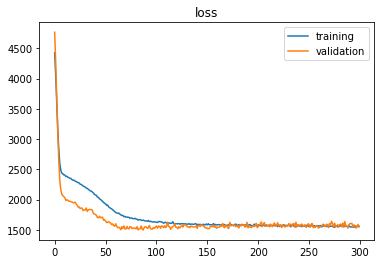

In [16]:
plt.plot(better_history.history['loss'], label='training')
plt.plot(better_history.history['val_loss'], label='validation')
plt.legend()
plt.title('loss')
plt.show()

We see a moderate, yet steady decrease in both curves before hitting a plateau of slight oscillation. The graphic shows, that we do not have to deal with overfitting and that our model seems to have converged.

Finally, let's have a look at the predictions of the trained model again:

There are ways to handle overfitting but we will not discuss them here.

Finally, let's have a look at the trained model again, using all the data:

In [17]:
y_pred = better_model.predict(x)

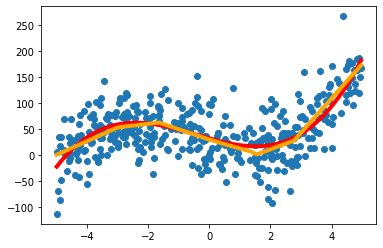

In [18]:
plt.scatter(x, y)
plt.plot(x,make_data(-.5,2,1.5,noise=False), c='red', lw=4)
plt.plot(x,y_pred.reshape(-1), c='orange', lw=4)
plt.show()

At last, we see that our more complex model is very well able to find the underlying function which we used to generate our data.

While we have only covered a tiny bit of TensorFlow and Keras, the syntax stays the same for different kinds of networks. For example, to build a convolutional artificial neural network, we would use `keras.Conv2D()` instead of `keras.Dense`. For more types of layers and how to build more complex architectures, visit the documentation refered to above.